# Capstone Project - Predicting The Risk Of Customer Churn 

## Feature Engineering2 And Modeling
***

### Author - Oyeronke Ayansola

### Date - 12/12/2022

### <font color=red> Notebook #4</font>
***

## Table of Contents
### [Model Goal](##ModelGoal)
### [Import Libraries And Data](##ImportLibrariesAndData)
### [Explore Dataframe](##ExploreAndMergeDataframe)
### [Categorical to Numerical Variables](##CategoricaltoNumericalVariables)
### [Train-Test Split](##Train-TestSplit)
   * [Test, Train and Validation Data Split](##Test_TrainandValidationDataSplit)
### [Models on Train and Validation Sets](##ModelsonTrainandValidationSets)
   * [1.Logistic Regression](##1_LogisticRegression)
   * [2.Decision Tree Classifier (DT)](##2_DecisionTreeClassifier(DT))
   * [3.K-Neighbors Classifier (KNN)](##3_K-NeighborsClassifier(KNN))
   * [Ensemble Models](##EnsembleModels)
   * [Random Forest Classifier](##RandomForestClassifier)
   * [XGBoost Model](##XGBoost)
   * [Downsampling](##Downsampling)
   * [Upsampling](##Upsampling)   
   * [Hyperparameters with Grid Search](###HyperparameterswithGridSearch)
### [Final Model - Scoring on Test Set](##FinalModel-ScoringonTestSet)
### [Conclusion](##Conclusion)
***

### Model Goal

In this notebook, the goal is to identify the best model that will classify churn customers as much possible, without misclassifying too many non-churn using confusion matrix with a good f1-score.

The best model will be identified using validation sets (a sub-set of our data) afterwards, the choosen model will be tested on a set-aside test dataset.
***

### Import Libraries

We need to import the packages require to run the models successfully.

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

# converting to datetime if neccessary
from datetime import datetime

# import converting categorical variables to numeric
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

# importing train test split from sklearn package to sub-set our data
from sklearn.model_selection import train_test_split

# import for parameters optimisation 
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.model_selection import GridSearchCV

# To try dimensionality reduction
from sklearn.decomposition import PCA


# import models from sklearn
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression


# import for model evaluation 
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import roc_curve, roc_auc_score



#Some of these packages will generate a ton of warnings...
import warnings
warnings.filterwarnings("ignore")


Next we will import the data a `csv` file, from `Notebook #2`

In [2]:
# import the data
df = pd.read_csv('df2_engineered.csv')

### Explore Data

In [3]:
# see the first few rows
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_latitude,customer_longitude,order_id,order_status,payment_sequential,...,shipping_limit_month,review_creation_month,review_answer_month,order_purchase_day,order_delivered_carrier_day,order_delivered_customer_day,order_estimated_delivery_day,shipping_limit_day,review_creation_day,review_answer_day
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509898,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,1.0,...,5,5,5,16,23,25,5,22,26,30
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,-20.509898,-47.397866,95261f608a64bbbe760a212b4d48a4ee,delivered,1.0,...,6,6,6,15,18,21,5,19,22,26
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,-20.509898,-47.397866,9444fa2ab50a3f5af63b48be297eda24,delivered,1.0,...,9,9,9,9,11,18,2,14,19,20
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,-20.509898,-47.397866,dceb8e88274c6f42a88a76ed979eb817,delivered,1.0,...,3,3,11,26,27,28,12,30,29,4
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,-20.509898,-47.397866,6ee1cea1b2edcc713f83ebfbccbc57f9,delivered,1.0,...,2,4,4,29,31,3,9,8,8,8


In [4]:
# see the shape of the data
df.shape

(94002, 68)

Our dataframe has `94,002` rows and `68` columns.

In [5]:
# see the datatypes
df.dtypes

customer_id                     object
customer_unique_id              object
customer_zip_code_prefix         int64
customer_city                   object
customer_state                  object
                                 ...  
order_delivered_customer_day     int64
order_estimated_delivery_day     int64
shipping_limit_day               int64
review_creation_day              int64
review_answer_day                int64
Length: 68, dtype: object

We will need to check for any duplication or null values because these will impact our model building negatively - models building requires non-null data.

In [6]:
# check for duplication
df.duplicated().sum()

0

In [7]:
# check for null values
df.isnull().any().sum()

0

There is no duplication or null values in our dataframe. Next, we will inspect our data for datatypes and examine the categorical variables. This is because we need to have all variables represented as numeric. 

In [8]:
# check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94002 entries, 0 to 94001
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     94002 non-null  object 
 1   customer_unique_id              94002 non-null  object 
 2   customer_zip_code_prefix        94002 non-null  int64  
 3   customer_city                   94002 non-null  object 
 4   customer_state                  94002 non-null  object 
 5   customer_latitude               94002 non-null  float64
 6   customer_longitude              94002 non-null  float64
 7   order_id                        94002 non-null  object 
 8   order_status                    94002 non-null  object 
 9   payment_sequential              94002 non-null  float64
 10  payment_type                    94002 non-null  object 
 11  payment_installments            94002 non-null  float64
 12  payment_value                   

We have some categorical variables. Let us see what these are and decide which ones are worth keeping for modeling.

In [9]:
# save the categorical columns in one dataframe
non_numeric_df = df.select_dtypes(['object'])
non_numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94002 entries, 0 to 94001
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer_id                    94002 non-null  object
 1   customer_unique_id             94002 non-null  object
 2   customer_city                  94002 non-null  object
 3   customer_state                 94002 non-null  object
 4   order_id                       94002 non-null  object
 5   order_status                   94002 non-null  object
 6   payment_type                   94002 non-null  object
 7   product_id                     94002 non-null  object
 8   seller_id                      94002 non-null  object
 9   review_id                      94002 non-null  object
 10  product_category_name          94002 non-null  object
 11  product_category_name_english  94002 non-null  object
 12  seller_city                    94002 non-null  object
 13  s

In [10]:
# check the shape
non_numeric_df.shape

(94002, 14)

We have 14 categorical columns some of which are `IDs` that we will need to drop. But first let us check the unique values of the rest of the columns.

In [11]:
print(f"payment_type_value: {df['payment_type'].nunique()}")
print(f"product_category_name_english-value: {df['product_category_name_english'].nunique()}")
print(f"customer_city_values: {df['customer_city'].nunique()}")
print(f"seller_city_values: {df['seller_city'].nunique()}")
print(f"customer_state_values: {df['customer_state'].nunique()}")
print(f"seller_state_values: {df['seller_state'].nunique()}")

payment_type_value: 4
product_category_name_english-value: 71
customer_city_values: 4023
seller_city_values: 587
customer_state_values: 27
seller_state_values: 22


We have columns for both cities and states, we need only one of them. Because the number of states (counted value - 27 and 22 for customer and seller respectively) are not as much as cities (4,023 for customer and 587 for customer seller), to make it easier in-terms of computation expense, we will delete `cities` and keep states. Likewise, we will drop all `IDs` columns. Also, we have the product category already represented in english, we will remove the other `product_category_name` and keep the english translated version.

From Notebook #3 - Data exploratory, some numerical variables are highly correlated, we will drop the highly correlated variables, these are `total_customer_price`, `total_customer_cost` and `payment_value`. We will also drop all `year` since we have `month` and `day`. 

In [12]:
# drop the id columns plus cities columns
df.drop(['customer_id', 'customer_unique_id', 'review_id', 'seller_id',
        'product_id', 'order_id', 
         'seller_city','customer_city','product_category_name', 
         'order_item_id', 'order_purchase_year', 'order_delivered_carrier_year',
       'order_delivered_customer_year', 'order_estimated_delivery_year', 
         'carrier_date_diff','shipping_limit_year',
        'review_creation_year', 'review_answer_year',
        'price', 'payment_value', 'total_customer_price','order_delivered_carrier_day',
          'total_customer_cost'], axis=1, inplace = True)

In [13]:
# sanity check
df.shape

(94002, 45)

We have a reduced dataframe now. let us check the info again, with 45 columns.

In [14]:
#see info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94002 entries, 0 to 94001
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_zip_code_prefix        94002 non-null  int64  
 1   customer_state                  94002 non-null  object 
 2   customer_latitude               94002 non-null  float64
 3   customer_longitude              94002 non-null  float64
 4   order_status                    94002 non-null  object 
 5   payment_sequential              94002 non-null  float64
 6   payment_type                    94002 non-null  object 
 7   payment_installments            94002 non-null  float64
 8   freight_value                   94002 non-null  float64
 9   review_score                    94002 non-null  float64
 10  product_name_length             94002 non-null  float64
 11  product_description_length      94002 non-null  float64
 12  product_photos_qty              

**Recency** was used in defining the **churn** category. For proper model 'learning' we will need to delete recency to avoid overfitting of our model. 

In [15]:
# drop Recency column
df.drop(['recency'], axis=1, inplace = True)

In [16]:
# sanity check
df.shape

(94002, 44)

In [17]:
#see info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94002 entries, 0 to 94001
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_zip_code_prefix        94002 non-null  int64  
 1   customer_state                  94002 non-null  object 
 2   customer_latitude               94002 non-null  float64
 3   customer_longitude              94002 non-null  float64
 4   order_status                    94002 non-null  object 
 5   payment_sequential              94002 non-null  float64
 6   payment_type                    94002 non-null  object 
 7   payment_installments            94002 non-null  float64
 8   freight_value                   94002 non-null  float64
 9   review_score                    94002 non-null  float64
 10  product_name_length             94002 non-null  float64
 11  product_description_length      94002 non-null  float64
 12  product_photos_qty              

### Categorical to Numerical Variables

For modeling as stated earlier, we will convert the non-numeric variables to numeric. Since we have dropped some, we will go ahead and have a look at the the remianing and convert them to numeric.

In [18]:
# check the 'object' data types
non_numeric_df2 = df.select_dtypes(['object'])
non_numeric_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94002 entries, 0 to 94001
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer_state                 94002 non-null  object
 1   order_status                   94002 non-null  object
 2   payment_type                   94002 non-null  object
 3   product_category_name_english  94002 non-null  object
 4   seller_state                   94002 non-null  object
dtypes: object(5)
memory usage: 3.6+ MB


There are 5 columns that are categorical, we will need to convert them to numeric columns. These are:

1. **customer_state**
2. **order_status**
3. **payment_type**
4. **product_category_name_english**
5. **seller_state**

We will transform the above columns using `OneHotEncoder`. 

In [19]:
# Put the columns to be converted in a list with the method to be used
column_transform_list = [
                         ('payment_type', OneHotEncoder(), ['payment_type']),
                         ('product_category_name_english', 
                          OneHotEncoder(), ['product_category_name_english']),
                         ('customer_state', OneHotEncoder(), ['customer_state']),
                         ('order_status', OneHotEncoder(), ['order_status']),
                         ('seller_state', OneHotEncoder(), ['seller_state'])
]

# Creating the column transformer
column_transformer = ColumnTransformer(column_transform_list)

# Fit it on the original dataset
column_transformer.fit(df)


ColumnTransformer(transformers=[('payment_type', OneHotEncoder(),
                                 ['payment_type']),
                                ('product_category_name_english',
                                 OneHotEncoder(),
                                 ['product_category_name_english']),
                                ('customer_state', OneHotEncoder(),
                                 ['customer_state']),
                                ('order_status', OneHotEncoder(),
                                 ['order_status']),
                                ('seller_state', OneHotEncoder(),
                                 ['seller_state'])])

In [20]:
# Get column names with the column titles as a prefix
column_transformer.get_feature_names()

['payment_type__x0_boleto',
 'payment_type__x0_credit_card',
 'payment_type__x0_debit_card',
 'payment_type__x0_voucher',
 'product_category_name_english__x0_agro_industry_and_commerce',
 'product_category_name_english__x0_air_conditioning',
 'product_category_name_english__x0_art',
 'product_category_name_english__x0_arts_and_craftmanship',
 'product_category_name_english__x0_audio',
 'product_category_name_english__x0_auto',
 'product_category_name_english__x0_baby',
 'product_category_name_english__x0_bed_bath_table',
 'product_category_name_english__x0_books_general_interest',
 'product_category_name_english__x0_books_imported',
 'product_category_name_english__x0_books_technical',
 'product_category_name_english__x0_cds_dvds_musicals',
 'product_category_name_english__x0_christmas_supplies',
 'product_category_name_english__x0_cine_photo',
 'product_category_name_english__x0_computers',
 'product_category_name_english__x0_computers_accessories',
 'product_category_name_english__x0

In [21]:
# Transform the original dataset

transformed_col = column_transformer.transform(df)

# Sanity check 
transformed_col


<94002x126 sparse matrix of type '<class 'numpy.float64'>'
	with 470010 stored elements in Compressed Sparse Row format>

We have succeeded in converting to a sparse matrix of numeric datatype with `126` columns. 

In [22]:
# put the transformed matrix to a dataframe

transformed_df = pd.DataFrame(transformed_col.toarray(),
                              columns=column_transformer.get_feature_names(),
                              index=df.index)

# sanity check
transformed_df.head()

,payment_type__x0_boleto,payment_type__x0_credit_card,payment_type__x0_debit_card,payment_type__x0_voucher,product_category_name_english__x0_agro_industry_and_commerce,product_category_name_english__x0_air_conditioning,product_category_name_english__x0_art,product_category_name_english__x0_arts_and_craftmanship,product_category_name_english__x0_audio,product_category_name_english__x0_auto,...,seller_state__x0_PE,seller_state__x0_PI,seller_state__x0_PR,seller_state__x0_RJ,seller_state__x0_RN,seller_state__x0_RO,seller_state__x0_RS,seller_state__x0_SC,seller_state__x0_SE,seller_state__x0_SP
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


We will now concatenate the transformed dataframe with our original dataframe and drop the columns we made the sparse matrix from.

In [23]:
# Concatenate the transformed_df and our original dataframe 

df = pd.concat([df, transformed_df], axis=1)

In [24]:
# Drop the former columns
df.drop(['payment_type', 'product_category_name_english', 
         'customer_state','order_status', 'seller_state'], axis=1, inplace=True)

# Sanity check
df.head()

,customer_zip_code_prefix,customer_latitude,customer_longitude,payment_sequential,payment_installments,freight_value,review_score,product_name_length,product_description_length,product_photos_qty,...,seller_state__x0_PE,seller_state__x0_PI,seller_state__x0_PR,seller_state__x0_RJ,seller_state__x0_RN,seller_state__x0_RO,seller_state__x0_RS,seller_state__x0_SC,seller_state__x0_SE,seller_state__x0_SP
0,14409,-20.509898,-47.397866,1.0,2.0,21.88,4.0,41.0,1141.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,14409,-20.509898,-47.397866,1.0,8.0,14.87,5.0,54.0,245.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,14409,-20.509898,-47.397866,1.0,1.0,17.60,5.0,40.0,403.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,14409,-20.509898,-47.397866,1.0,3.0,12.79,5.0,46.0,708.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,14409,-20.509898,-47.397866,1.0,1.0,13.11,5.0,51.0,339.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
# check the shape
df.shape

(94002, 165)

We ended up with `165` columns after transformation.

### Train-Test Split

In our dataframe, we have dependent and independent features. It is neccessary to separate these two into different dataframes. Our traget variable - the dependent feature which is the `churn` column will be represented as `y` while the others - the independent features will be represented as `X`.

In [26]:
# Assign dependent and independent variables
X = df.drop('churn', axis = 1)
y = df['churn']

In [27]:
# let's see the shape
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (94002, 164)
y shape: (94002,)


#### Test, Train and Validation Data  Split

In order to guard against overfitting, we will split our data into 3 sets namely; **Train**, **Test**, and **validation**. 

We will fit the models to train set, use validation set to tune a model's hyperparameters and use as a somewhat unbiased estimate of the model's performance. We except our model not to overfit to this data since we will not fit our model to validation set. But when we adjust the hyperparametrs, we may still be overfiting to it in someway. 

The test set will be a total unbiased estimate of the model's performance since the model has never seen it before. We will set the test set aside while we check the performance of our models on the validation set first. 

In [28]:
# spliting our data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 67, stratify = y)

# Checking the shape of our train and test sets
print(f'The X_train set has {X_train.shape} shape.')
print(f'The X_test set has {X_test.shape} shape.')
print(f'The y_train set has {y_train.shape} shape.')
print(f'The y_test set has {y_test.shape} shape.')

The X_train set has (75201, 164) shape.
The X_test set has (18801, 164) shape.
The y_train set has (75201,) shape.
The y_test set has (18801,) shape.


In [29]:
# Split the train set into train (X2 and y2) and validation sets
X2_train, X_val, y2_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=1, stratify = y_train)

# Print split info 
print(f'The train set has {len(X2_train)} data points.')
print(f'The validation set has {len(X_val)} data points.')

The train set has 52640 data points.
The validation set has 22561 data points.


We now have our final proportion to be:
- Test set: 0.2
- Training set: 0.8 of 0.7 = 56%
- Validation set: 0.8 of 0.3 = 24% 
    
The data shape originally was 94,002 data points. We now have:

* Test Set: 0.2 * 94,002 $\approx$ 18,800
* Validation Set: 0.24 * 94,002 $\approx$ 22,560
* Training Set: 0.56 * 94,002 $\approx$ 52,641

We need to make sure the `statify` function works well and the sets proportion have been preserved in every `y` set.

In [30]:
# check that the class proportions have been preserved in all sets.
print('Proportions in original data:')
print(y_train.value_counts()/len(y_train), '\n')

print('Proportions in remainder set:')
print(y2_train.value_counts()/len(y2_train), '\n')

print('Proportions in test set:')
print(y_test.value_counts()/len(y_test), '\n')

print('Proportions in validation set:')
print(y_val.value_counts()/len(y_val), '\n')

Proportions in original data:
1    0.782915
0    0.217085
Name: churn, dtype: float64 

Proportions in remainder set:
1    0.782922
0    0.217078
Name: churn, dtype: float64 

Proportions in test set:
1    0.782884
0    0.217116
Name: churn, dtype: float64 

Proportions in validation set:
1    0.7829
0    0.2171
Name: churn, dtype: float64 



The proportions appear to be have been preserved. We have imbalance in our `target-y` variable, we will try and balance the class later but for now, we will use it as it is.

***
### Models on Train and Validation Sets

In the first set of modeling, we will utilise only the **validation** set for model accuracy and evaluation and keep our **test** set for later.

Prior to fitting model, we need to scale first. We do not want our model to assume a distribution for our data, therefore, we will use MinMax scaler because we need to keep the original distribution in place.

The evaluation metrics that will be used to evaluate the performance of the models is the recall score, f1-score and the AUC score.

In AUC our model is more confident that the positive point belongs to the positive class than the negative point belongs to the positive class.

In [31]:
# Set scale for the data
# instantiate scaler
scaler = MinMaxScaler()

X2_train_ss = scaler.fit_transform(X2_train)
X_val_ss = scaler.transform(X_val)

### 1. Logistic Regression

We will fit the data using logistic regression, that is the validation and train set. Next, we will check the accuracies on both validation and train sets and evaluate the model's performance, without adjusting the default parameters but setting random state to `234` - this may be any value, acting as seed for reproducibility.

In [32]:
# Logistic Regression model
# instantiate the model and fit it on the scaled data
LR_model = LogisticRegression(random_state=234).fit(X2_train_ss, y2_train)

# print out the train and validation accuracy scores
print(f"Train accuracy: {LR_model.score(X2_train_ss, y2_train)}")
print(f"Validation accuracy: {LR_model.score(X_val_ss, y_val)}")

Train accuracy: 0.7848594224924013
Validation accuracy: 0.7827223970568681


The accuracies on our train and validation sets seems very good, at 78.48% and 78.27% respectively. Because we have an imbalance class data, accuracy is not the best metrics for our model performance, this can lead to a false sense of confidence.

We will look at classification report, evaluting the performance for f-1 score, precision and recall. 

In [33]:
# get the classification report
y_pred = LR_model.predict(X_val_ss)

report_initial = classification_report(y_val, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.50      0.06      0.10      4898
           1       0.79      0.98      0.88     17663

    accuracy                           0.78     22561
   macro avg       0.64      0.52      0.49     22561
weighted avg       0.73      0.78      0.71     22561



The classification report for logistic regression is not so great. The model is 50% precise in predicting customer churn, and able to recall just 6% churn, with a f1 score of 10%! 

Let us properly view this in a confusion matrix, to see how many true positive and true negative churn number the model will predict and how accurate our predictions will be.

In [34]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

display(y_val.value_counts())

# confusion matrix
confusion_matrix = pd.DataFrame(
    data = confusion_matrix(y_val, y_pred),
    index = ['True Churn', 'True Non-churn'],
    columns = ['Predicted Churn', 'Predicted Non-churn']
)
display(confusion_matrix)

1    17663
0     4898
Name: churn, dtype: int64

,Predicted Churn,Predicted Non-churn
True Churn,282,4616
True Non-churn,286,17377


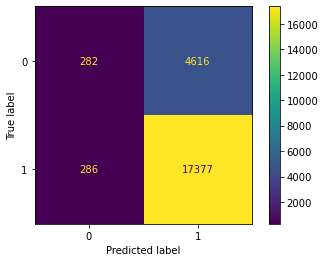

In [35]:
# plot confusion matrix
plot_confusion_matrix(LR_model, X_val_ss, y_val);

We have a total of 4,898 for **Churn** and the model was able to accurately predict 282 (5.7%). The model missed 4,616 churned customers, and predicted those as Non-churn.

Also, our model was able to predict 17,377 as Non-churn out of 17,663 (98.38%) and misclassified 286 as being churn. Therfore we have high type 1 error and our goal is to accurately predict churn with minimal type 1 error.

Next, we will check AUC score.

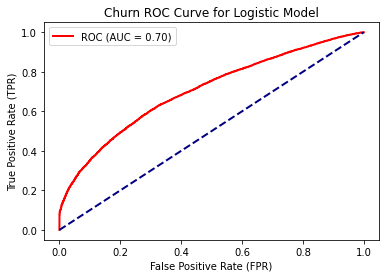

In [36]:
# predicting probabilities of data points being in the positive class  
y_val_proba = LR_model.predict_proba(X_val_ss)[:,1] 

# create ROC arrays
fprs, tprs, thresholds = roc_curve(y_val, y_val_proba)

# AUC
roc_auc = roc_auc_score(y_val, y_val_proba)

# plot
plt.figure()
plt.plot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1],  lw=2, color='navy', linestyle='--') # random guess 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Churn ROC Curve for Logistic Model')
plt.legend(loc='best')
plt.show()

The ROC for our logistic regression model has a AUC score of `70%`. This implies that the model was able to distinguish between the positive and negative classes with an accuracy of 70%.

### 2. Decision Tree Classifier (DT)

Next, we will check the train and validation set on DT model and evaluate the model as described above.


In [37]:
# instantiate and fit the model on the train set
DT_model = DecisionTreeClassifier(random_state=234).fit(X2_train, y2_train)

# score the train and validation set
print(f"Train accuracy: {DT_model.score(X2_train, y2_train)}")
print(f"Validation accuracy: {DT_model.score(X_val, y_val)}")

Train accuracy: 1.0
Validation accuracy: 0.8827622889056336


Interestingly, the train and validation accuracies are very good with train accuracy at 100% and validation set at 88.27%! But as stated earlier, we have an imbalance class hence we will need to proceed to more evaluation. 

In [38]:
# get the classification report
y_pred = DT_model.predict(X_val)

report_initial = classification_report(y_val, y_pred)
print(report_initial)


              precision    recall  f1-score   support

           0       0.73      0.73      0.73      4898
           1       0.93      0.92      0.93     17663

    accuracy                           0.88     22561
   macro avg       0.83      0.83      0.83     22561
weighted avg       0.88      0.88      0.88     22561



In [39]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# display the class distribution to see the totals for each class
display(y_val.value_counts())

# confusion matrix
confusion_matrix = pd.DataFrame(
    data = confusion_matrix(y_val, y_pred),
    index = ['True Churn', 'True Non-churn'],
    columns = ['Predicted Churn', 'Predicted Non-churn']
)
display(confusion_matrix)

1    17663
0     4898
Name: churn, dtype: int64

,Predicted Churn,Predicted Non-churn
True Churn,3593,1305
True Non-churn,1340,16323


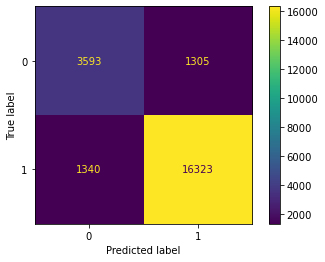

In [40]:
# plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(DT_model, X_val, y_val);

Here, from a total of 4,898 for **Churn** and the model was able to accurately predict 3,593 (73.35%). The model missed 1,305 churned customers, and predicted those as Non-churn.

Also, our model was able to predict 16,323 as Non-churn out of 17,663 (92.41%) and misclassified 1,340 as being churn. 

This a better model for `churn` classification than logistic regression.  

Next, we will check AUC score.

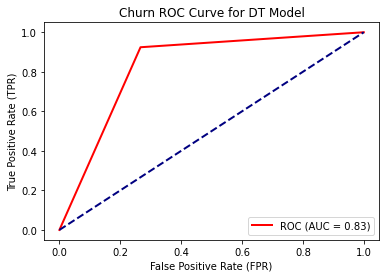

In [41]:
# predicting probabilities of data points being in the positive class  
y_val_proba = DT_model.predict_proba(X_val)[:,1]

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_val, y_val_proba)

# AUC
roc_auc = roc_auc_score(y_val, y_val_proba)

# plot
plt.figure()
plt.plot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1],  lw=2, color='navy', linestyle='--') # random guess 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Churn ROC Curve for DT Model')
plt.legend(loc='best')
plt.show()

The ROC for our DT model is at `83%`, also better AUC score.

### 3. K-Neighbors Classifier (KNN)

We will check the train and validation set on KNN model and evaluate the model.


In [42]:

from sklearn.neighbors import KNeighborsClassifier

# instantiate the KNN model and fit it on the scaled data

KNN_model = KNeighborsClassifier().fit(X2_train_ss, y2_train)


# print out the train and validation scores
print(f"Number of Neighbors: {KNN_model.n_neighbors}")
print(f"Train accuracy: {KNN_model.score(X2_train_ss, y2_train)}")
print(f"Validation accuracy: {KNN_model.score(X_val_ss, y_val)}")

Number of Neighbors: 5
Train accuracy: 0.844927811550152
Validation accuracy: 0.7691591684765746


At K `number of neighbors = 5`, we have train accuracy score of 84.49% and validation at 76.92%. Again, accuracy does not properly describe our model evalution.

In [43]:
# classification report
y_pred = KNN_model.predict(X_val_ss)

report_initial = classification_report(y_val, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.45      0.28      0.34      4898
           1       0.82      0.91      0.86     17663

    accuracy                           0.77     22561
   macro avg       0.63      0.59      0.60     22561
weighted avg       0.74      0.77      0.75     22561



In [44]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# display the class distribution to see the totals for each class
display(y_val.value_counts())

# confusion matrix
confusion_matrix = pd.DataFrame(
    data = confusion_matrix(y_val, y_pred),
    index = ['True Churn', 'True Non-churn'],
    columns = ['Predicted Churn', 'Predicted Non-churn']
)
display(confusion_matrix)

1    17663
0     4898
Name: churn, dtype: int64

,Predicted Churn,Predicted Non-churn
True Churn,1364,3534
True Non-churn,1674,15989


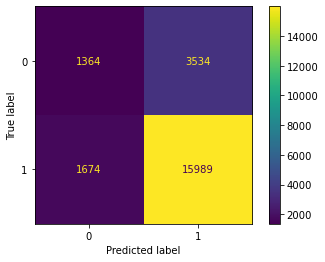

In [45]:
# plot confusion metric
plot_confusion_matrix(KNN_model, X_val_ss, y_val);

Out of  4,898 for **Churn** and the model was able to accurately predict 1,364 (27.84%). The model missed 3,534 churned customers, and predicted those as Non-churn. 

Our model was able to predict 15,989 as Non-churn out of 17,663 (90.52%) and misclassified 1,674 as being churn. 

KNN result has the a low predicted class (27.84%) with 45% precision, 28% recall and f1-score of 34%.

Let us check AUC score.

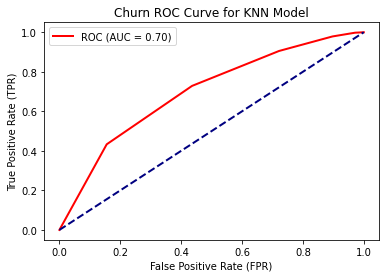

In [46]:
# predicting probabilities of data points being in the positive class  
y_val_proba = KNN_model.predict_proba(X_val_ss)[:,1] 

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_val, y_val_proba)

# AUC
roc_auc = roc_auc_score(y_val, y_val_proba)
                        
# plot
plt.figure()
plt.plot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1],  lw=2, color='navy', linestyle='--') # random guess 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Churn ROC Curve for KNN Model')
plt.legend(loc='best')
plt.show()

The ROC for our KNN model is at `70%` AUC score.

We have results for our traditional models: Logistic Regression, DT and KNN. Let us have a look at the summary of our results.


Model | True Negative | False Positive| Precision(%) |    Recall(%)       |f1-score(%)
---------------|--------|------------- |-------------|-------------|-------------
Logistic Regression| 282 (6%)| 4616 (94%)|50 | 6 | 10
Decision Tree | 3593 (73%) | 1305 (27%) |73 | 73 | 73
KNN | 1364 (28%) | 3534 (72%) |45 | 28 | 34

The best model so far is DT with the same percentage for f1-score, precision and a recall. 

### Ensemble Models

So far, we our best model performance at 73% precision, recall and f1-score, but it is possible to make our model even better. Let us try ensemble models. 

An ensemble model is a collection of many machine learning models, which are used to gain more predictive power. We will use **Random Forest** and **eXtreme Gradient Boosting (XGBoost)**.

### Random Forest Classifier

A random forest is an ensemble of decision trees. It is a subset of the bigger ensemble type called bagging. We will fit our model on the train set as always and score on validation set.

In [47]:
# import the classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the model and fit the model to the scaled data
RF_model = RandomForestClassifier(random_state=234).fit(X2_train_ss, y2_train)


# print the train and validation scores
print(f"Number of Trees in the Forest: {RF_model.n_estimators}")
print(f"Train accuracy: {RF_model.score(X2_train_ss, y2_train)}")
print(f"Validation accuracy: {RF_model.score(X_val_ss, y_val)}")


Number of Trees in the Forest: 100
Train accuracy: 1.0
Validation accuracy: 0.9129471211382474


As always, although accuracy is very good but we can not rely on it due to data imbalance.

In [48]:
y_pred = RF_model.predict(X_val_ss)

report_initial = classification_report(y_val, y_pred)
print(report_initial)


              precision    recall  f1-score   support

           0       0.91      0.66      0.77      4898
           1       0.91      0.98      0.95     17663

    accuracy                           0.91     22561
   macro avg       0.91      0.82      0.86     22561
weighted avg       0.91      0.91      0.91     22561



Seems our model selection is improving! We have a recall of 91%, f1-score of 77% but a lower recall, 66%.

In [49]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# display the class distribution to see the totals for each class
display(y_val.value_counts())

# confusion matrix
confusion_matrix = pd.DataFrame(
    data = confusion_matrix(y_val, y_pred),
    index = ['True Churn', 'True Non-churn'],
    columns = ['Predicted Churn', 'Predicted Non-churn']
)
display(confusion_matrix)


1    17663
0     4898
Name: churn, dtype: int64

,Predicted Churn,Predicted Non-churn
True Churn,3235,1663
True Non-churn,301,17362


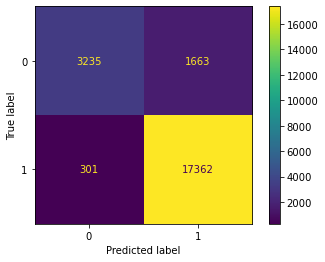

In [50]:
# plot confusion matrix
plot_confusion_matrix(RF_model, X_val_ss, y_val);


RF model was able to accurately predict 3,235 (66%). The model incorrectly classified 1,663 of churned customers as no-churn.

The vast majority of data points are from class 1 (no-churn) and were correctly predicted, 17,362 (98%) were predicted correctly as no-churn by the model out of 17,663.

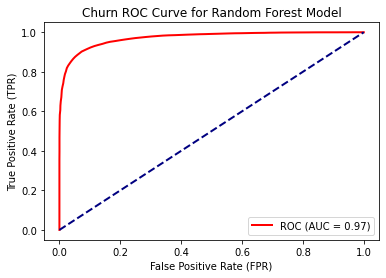

In [51]:
# predicting probabilities of data points being in the positive class
y_val_proba = RF_model.predict_proba(X_val_ss)[:,1] 

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_val, y_val_proba)

# AUC
roc_auc = roc_auc_score(y_val, y_val_proba)

# plot
plt.figure()
plt.plot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1],  lw=2, color='navy', linestyle='--') 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Churn ROC Curve for Random Forest Model')
plt.legend(loc='best')
plt.show()


We have a good `AUC` at 97%.

### XGBoost Model

We will now fit on XGBoost, which is known to be faster and more accurate than the scikit-learn implementation. It also has several modifications to the underlying fitting method which tend to help in practice.

In [52]:
# import the classifier

from xgboost import XGBClassifier

# instantiate and fit the model
XGB_model = XGBClassifier().fit(X2_train, y2_train)

# print the scores
print(f"Train accuracy: {XGB_model.score(X2_train, y2_train)}")
print(f"Validation accuracy: {XGB_model.score(X_val, y_val)}")


Train accuracy: 0.9740691489361702
Validation accuracy: 0.946146004166482


As always, although accuracy is very good but we can not rely on it due to data imbalance.

In [53]:
# display the classification report
y_pred = XGB_model.predict(X_val)

report_initial = classification_report(y_val, y_pred)
print(report_initial)


              precision    recall  f1-score   support

           0       0.90      0.85      0.87      4898
           1       0.96      0.97      0.97     17663

    accuracy                           0.95     22561
   macro avg       0.93      0.91      0.92     22561
weighted avg       0.95      0.95      0.95     22561



This is a very good model as well. We have a precision of 90%!, recall of 85% and f1-score of 87%.

In [54]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# display the class distribution to see the totals for each class
display(y_val.value_counts())

# confusion matrix
confusion_matrix = pd.DataFrame(
    data = confusion_matrix(y_val, y_pred),
    index = ['True Churn', 'True Non-churn'],
    columns = ['Predicted Churn', 'Predicted Non-churn']
)
display(confusion_matrix)

1    17663
0     4898
Name: churn, dtype: int64

,Predicted Churn,Predicted Non-churn
True Churn,4145,753
True Non-churn,462,17201


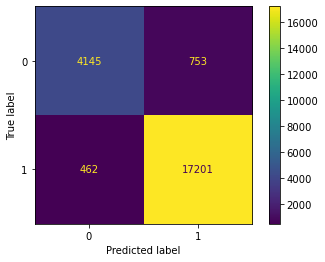

In [55]:
# plot confusion matrix
plot_confusion_matrix(XGB_model, X_val, y_val);


For XGB, out of 4,898 for **Churn**, the model was able to accurately predict 4,145(85%). The model missed 753(15%) churned customers, and predicted those as non-churn. 

Our model was able to predict 17,201(97%) as non-churn out of 17,663 and misclassified 462(3%) as being churn. 


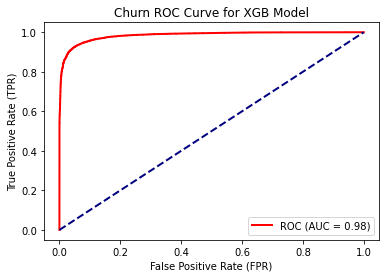

In [56]:
# predicting probabilities of data points being in the positive class
y_val_proba = XGB_model.predict_proba(X_val)[:,1] 

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_val, y_val_proba)

# AUC
roc_auc = roc_auc_score(y_val, y_val_proba)

# plot
plt.figure()
plt.plot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1],  lw=2, color='navy', linestyle='--') # random guess 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Churn ROC Curve for XGB Model')
plt.legend(loc='best')
plt.show()


AUC score is 98%.

### Ensemble Models summary

We have our model evaluation results from both Random forest and XGBoost. Below is a summary table of our result.


Model | True Negative | False Positive| Precision(%) |    Recall(%)       |f1-score(%)
---------------|--------|------------- |-------------|-------------|-------------
Logistic Regression| 282 (6%)| 4616 (94%)|50 | 6 | 10
Decision Tree | 3593 (73%) | 1305 (27%) |73 | 73 | 73
KNN | 1364 (28%) | 3534 (72%) |45 | 28 | 34
**Random Forest**| **3235 (66%)**| **1663 (34%)**|**91** | **66**| **77**
**XGBoost** | **4145 (85%)** | **753 (15%)** |**90** | **85** | **87**


Random forest and XGBoost model perform better than the other base models seen earlier. Random forest have a precision of 91% and 77% f1-score while XGBoost have a precision of 90%, 87% f1-score and a better recall, 85%.

In general, our ensemble models are very good with precision, recall and f1-scores (except Random forest recall). We will also be comparing the ability of a model to **correctly predict churn class - 0 (True negative)**. Random forest misclassified churn the lowest, 1,663 churn were misclassified as non-churn. XGBoost also misclassified 753 as non-churn. 

### Downsampling 

Because of imbalance data, can we try and downsample or upsample to get a balanced data? Next, we will try both and fit our model on XGBoost, since we are sure it is one of our good model so far and a faster model to run.

For downsampling, we will resample the majority class (1) to have a smaller number of observations to balance out the classes instead of increasing the minority class (0). 

In [57]:
# import resampled
from sklearn.utils import resample

# downsample
print("Number of Class 1 examples before:", X2_train[y2_train==1].shape[0])



# resample the data  - reduce class 1 to match 0
X_downsampled, y_downsampled = resample(X2_train[y2_train==1],
                                        y2_train[y2_train==1],
                                        replace=True,
                                        n_samples=X2_train[y2_train==0].shape[0],
                                        random_state=234)

# print out new distribution
print("Number of Class 1 examples after:", X_downsampled.shape[0])

# Combine downsample with original data
X_train_down = np.vstack((X2_train[y2_train == 0], X_downsampled))
y_train_down = np.hstack((y2_train[y2_train == 0], y_downsampled))

Number of Class 1 examples before: 41213
Number of Class 1 examples after: 11427


In [58]:
# check downsampled data

print('Original class distribution')
display(pd.Series(y2_train).value_counts().sort_index())

print('\nResampled class distribution (Downsampled)')
display(pd.Series(y_train_down).value_counts().sort_index())


Original class distribution


0    11427
1    41213
Name: churn, dtype: int64


Resampled class distribution (Downsampled)


0    11427
1    11427
dtype: int64

RF Confusion matrices: 



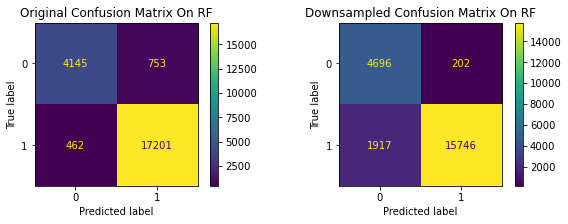


Original data classification report: 
               precision    recall  f1-score   support

           0       0.90      0.85      0.87      4898
           1       0.96      0.97      0.97     17663

    accuracy                           0.95     22561
   macro avg       0.93      0.91      0.92     22561
weighted avg       0.95      0.95      0.95     22561


Downsampled data classification report: 
               precision    recall  f1-score   support

           0       0.71      0.96      0.82      4898
           1       0.99      0.89      0.94     17663

    accuracy                           0.91     22561
   macro avg       0.85      0.93      0.88     22561
weighted avg       0.93      0.91      0.91     22561



In [59]:
#####################
### MODEL FITTING ###
#####################


# on the original data
churn_XGB_model = XGBClassifier().fit(X2_train, y2_train)

# evaluate on the original val set
y_pred = churn_XGB_model.predict(X_val.values)

# classification report
report_initial = classification_report(y_val, y_pred)

# on the downsampled data
churn_XGB_model_down = XGBClassifier().fit(X_train_down, y_train_down)

# evaluate on the original val set - NO SAMPLING
y_pred_2 = churn_XGB_model_down.predict(X_val) 

# classification report
report_downsampled = classification_report(y_val, y_pred_2)


#####################
### PRINT RESULTS ###
#####################

print_line = "\n=======================================================\n"

# Confusion matrices
print("RF Confusion matrices:", print_line)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Model on the original data
plot_confusion_matrix(churn_XGB_model, X_val, y_val, ax=axes[0])
axes[0].set_title('Original Confusion Matrix On RF')

# Model on the upsampled data
plot_confusion_matrix(churn_XGB_model_down, X_val, y_val, ax=axes[1])
axes[1].set_title('Downsampled Confusion Matrix On RF')

plt.show()

# Classification Reports
print("\nOriginal data classification report:", print_line, report_initial)
print("\nDownsampled data classification report:", print_line, report_downsampled)

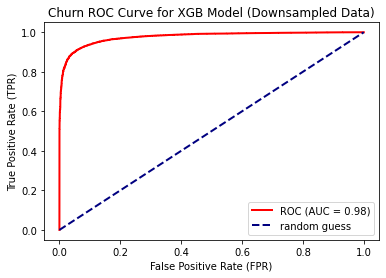

In [60]:
# predicting probabilities of data points being in the positive class
y_val_proba = churn_XGB_model_down.predict_proba(X_val.values)[:,1] 
# ROC arrays
fprs, tprs, thresholds = roc_curve(y_val, y_val_proba)

# AUC
roc_auc = roc_auc_score(y_val, y_val_proba)

# plot
plt.figure()
plt.plot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1],  lw=2, color='navy', linestyle='--', label='random guess') 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Churn ROC Curve for XGB Model (Downsampled Data)')
plt.legend(loc='best')
plt.show()

We compare the original result (without downsampling) with result from downsampling. The precision and f1-score for original XGB is better! XGB down-sampled has a lower precision (71%), f1-score (82%) and a slightly higher recall value (96%). Although, down-sampled with XGB has a false positive of 202 (4%), we are more confident that the original XGB result is more accurate (90% precision and 87% f1-score).

AUC score is 98%.

Let us try to upsample and compare the results.

### Upsampling

Similar to downsampling, upsampling entails resampling the observations that belong to the underrepresented class so that our training data consists of equal proportions of each class. 

In [61]:
# upsample 
from sklearn.utils import resample

# print the original class 0 distribution
print('Number of Class 0 examples before:', X2_train[y2_train==0].shape[0])


# resample the data to upsample the class 0 distribution
X_upsampled, y_upsampled = resample(X2_train[y2_train==0],
                                    y2_train[y2_train==0],
                                    replace=True,
                                    n_samples=X2_train[y2_train==1].shape[0],
                                    random_state=234)

# print out the new class 0 distribution
print('Number of Class 0 examples after:', X_upsampled.shape[0])

# combine the upsampled data with the original data
X_train_up = np.vstack((X2_train[y2_train==1], X_upsampled))
y_train_up = np.hstack((y2_train[y2_train==1], y_upsampled))


Number of Class 0 examples before: 11427
Number of Class 0 examples after: 41213


In [62]:
# check downsampled data

print('Original class distribution')
display(pd.Series(y2_train).value_counts().sort_index())

print('\nResampled class distribution (UPsampled)')
display(pd.Series(y_train_up).value_counts().sort_index())



Original class distribution


0    11427
1    41213
Name: churn, dtype: int64


Resampled class distribution (UPsampled)


0    41213
1    41213
dtype: int64

Confusion matrices: 



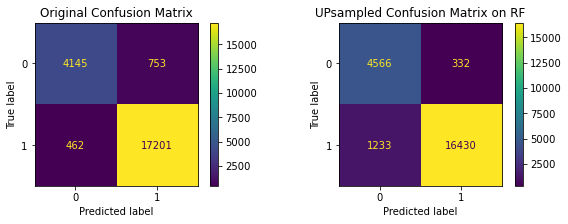


Original data classification report: 
               precision    recall  f1-score   support

           0       0.90      0.85      0.87      4898
           1       0.96      0.97      0.97     17663

    accuracy                           0.95     22561
   macro avg       0.93      0.91      0.92     22561
weighted avg       0.95      0.95      0.95     22561


Upsampled data classification report: 
               precision    recall  f1-score   support

           0       0.79      0.93      0.85      4898
           1       0.98      0.93      0.95     17663

    accuracy                           0.93     22561
   macro avg       0.88      0.93      0.90     22561
weighted avg       0.94      0.93      0.93     22561



In [63]:
#####################
### MODEL FITTING ###
#####################


# on the original data
churn_XGB_model = XGBClassifier().fit(X2_train, y2_train)


# evaluate on the original val set
y_pred = churn_XGB_model.predict(X_val.values)

# classification report
report_initial = classification_report(y_val, y_pred)

# on the upsampled data
churn_XGB_model_up = XGBClassifier().fit(X_train_up, y_train_up)

# evaluate on the original val set - NO SAMPLING
y_pred_2 = churn_XGB_model_up.predict(X_val) 

# classification report
report_upsampled = classification_report(y_val, y_pred_2)


#####################
### PRINT RESULTS ###
#####################

print_line = "\n=======================================================\n"

# Confusion matrices
print("Confusion matrices:", print_line)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Model on the original data
plot_confusion_matrix(churn_XGB_model, X_val, y_val, ax=axes[0])
axes[0].set_title('Original Confusion Matrix')

# Model on the upsampled data
plot_confusion_matrix(churn_XGB_model_up, X_val, y_val, ax=axes[1])
axes[1].set_title('UPsampled Confusion Matrix on RF')

plt.show()

# Classification Reports
print("\nOriginal data classification report:", print_line, report_initial)
print("\nUpsampled data classification report:", print_line, report_upsampled)

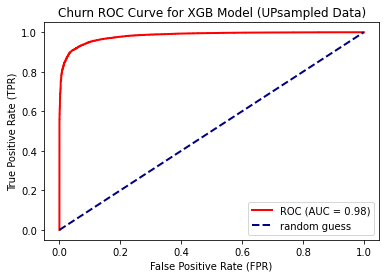

In [64]:
# probabilistic prediction
y_val_proba = churn_XGB_model_up.predict_proba(X_val.values)[:,1] 
# ROC arrays
fprs, tprs, thresholds = roc_curve(y_val, y_val_proba)

# AUC
roc_auc = roc_auc_score(y_val, y_val_proba)

# plot
plt.figure()
plt.plot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1],  lw=2, color='navy', linestyle='--', label='random guess') # random guess 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Churn ROC Curve for XGB Model (UPsampled Data)')
plt.legend(loc='best')
plt.show()
    

Let us have a look at our results so far.

Model | True Negative | False Positive| Precision(%) |    Recall(%)       |f1-score(%)
---------------|--------|------------- |-------------|-------------|-------------
Logistic Regression| 282 (6%)| 4616 (94%)|50 | 6 | 10
Decision Tree | 3593 (73%) | 1305 (27%) |73 | 73 | 73
KNN | 1364 (28%) | 3534 (72%) |45 | 28 | 34
Random Forest| 3235 (66%)| 1663 (34%)|91| 66| 77
XGBoost | 4145 (85%) | 753 (15%) |90 | 85 | 87
**Down sampled**| **4696 (96%)**| **202 (4%)**|**71** | **96**| **82**
**Up sampled** | **4566 (93)** | **332 (7%)** |**79** | **93** | **85**

Up-sampled model has a higher precision (79%) and f1-score (85%) than down-sampled.

### Hyperparameters with Grid Search

So far, we have good result with XGB, but can we make it better? Our next approach is to optimise hyperparameters instead of using the default parameters. We will do this with `parameter grid search`.

We will build a pipeline that consists of any number of transformers, models and an estimator. 

As seen earlier our best performing models are (without sampling):

1. **Random forest**
2. **XGBoost**
3. **Decision tree** 

These are the models we will pass into our parameter grid and futher search for parameters that will give us more robust model.

We will set up a pipeline and create a placeholder and will be changed when we pass the pipeline into the grid search later.

In [66]:
# Set up a pipeline and placeholder
my_pipeline = Pipeline([('scaler', StandardScaler()), ('dim_reducer', PCA()), 
                        ('model', LogisticRegression())])

Now let us set our parameter grid.

In [68]:
# set different range of C values 
c_values = [.00001, .0001, .001, .1, 1, 10, 100, 1000, 10000]

n_estimators = [100, 200, 400, 600, 800]

max_depth=[2, 8, 16]

# Parameter grid
param_grid = [
    
    # DT
    {
    'model__max_depth': [2, 3, 5, 10, 20],
    'model__min_samples_leaf': [5, 10, 20, 50, 100],
    'model__criterion': ["gini", "entropy"],
    'model': [DecisionTreeClassifier(random_state=42)]},
    
    # XGB
    {'scaler': [None],
     'model__eta': [0.1, 0.3],
     'model__gamma': [0, 2],
     'model__max_depth': np.arange(1, 10),
     'model__min_child_weight': [1, 3],
     'model': [XGBClassifier(random_state=234)]},
    
    # Random Forest
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     "model__max_features": [1, 3, 10],
     "model__min_samples_split": [1, 3, 10],
     "model__min_samples_leaf": [1, 3, 10],
     "model__criterion": ["gini", "entropy"],
     'model': [RandomForestClassifier(max_depth = max_depth, n_estimators=n_estimators, random_state=134)]}
    
]

In [69]:
grid_s  = GridSearchCV(my_pipeline, param_grid=param_grid, n_jobs=-1, verbose=1, cv=5)

fitted_grid_s= grid_s.fit(X_train_down, y_train_down)

Fitting 5 folds for each of 338 candidates, totalling 1690 fits


In [70]:
# The best hyperparameters
fitted_grid_s.best_params_

{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eta=0.3, eval_metric=None,
               feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
               max_leaves=None, min_child_weight=1, missing=nan,
               monotone_constraints=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, predictor=None, ...),
 'model__eta': 0.3,
 'model__gamma': 0,
 'model__max_depth': 8,
 'model__min_child_weight': 1,
 'scaler': None}

The best model is XGB and with parameters `eta = 0.3`, `gamma = 0`, `max_depth at 8`, and `min_child_weight at 1`. Let us utilise these parameters and check the result.

In [71]:
# fit on XGB # on the original data
best_params = XGBClassifier(random_state=234, eta= 0.3, 
                            gamma=0,max_depth =8, min_child_weight=1).fit(X2_train, y2_train)

best_params.fit(X2_train, y2_train)

# print out the scores
print(f"Train accuracy: {best_params.score(X2_train, y2_train)}")
print(f"Validation accuracy: {best_params.score(X_val, y_val)}")

Train accuracy: 0.9956686930091185
Validation accuracy: 0.9543459953016267


In [72]:
# display the classification report
y_pred = best_params.predict(X_val)

report_best_params = classification_report(y_val, y_pred)
print(report_best_params)


              precision    recall  f1-score   support

           0       0.92      0.87      0.89      4898
           1       0.96      0.98      0.97     17663

    accuracy                           0.95     22561
   macro avg       0.94      0.92      0.93     22561
weighted avg       0.95      0.95      0.95     22561



In [73]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# display the class distribution to see the totals for each class
display(y_val.value_counts())

# confusion matrix
confusion_matrix = pd.DataFrame(
    data = confusion_matrix(y_val, y_pred),
    index = ['True Churn', 'True Non-churn'],
    columns = ['Predicted Churn', 'Predicted Non-churn']
)
display(confusion_matrix)

1    17663
0     4898
Name: churn, dtype: int64

,Predicted Churn,Predicted Non-churn
True Churn,4256,642
True Non-churn,388,17275


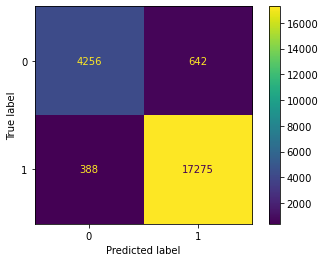

In [75]:
# plot matrix
plot_confusion_matrix(best_params, X_val, y_val);


By optimising parameters using grid search, our model performance seems better (92%, 87% and 89% precision, recall and f-1 score respectively) than using XGB default parameters. 

Since we also have better performance with XGB sampling when compared with baseline models (LR, DT amd KNN), we fit our validation set on XGB adjusted parameters and both up-sampled and down-sampled.  

In [79]:
# fit down-sampled model with the best XGB parameters 
down_XGB_model_best_params = XGBClassifier(eta=0.3, gamma=0, 
                                      max_depth=8, min_child_weight=1, random_state=234).fit(X_train_down, y_train_down)

# print out the scores
print(f"Train accuracy: {down_XGB_model_best_params.score(X_train_down, y_train_down)}")
print(f"Validation accuracy: {down_XGB_model_best_params.score(X_val.values, y_val)}")



Train accuracy: 0.998337271374814
Validation accuracy: 0.9171579273968352


In [80]:
# display the classification report
y_pred = down_XGB_model_best_params.predict(X_val.values)

down_report_XGB = classification_report(y_val, y_pred)
print(down_report_XGB)

              precision    recall  f1-score   support

           0       0.74      0.96      0.83      4898
           1       0.99      0.90      0.94     17663

    accuracy                           0.92     22561
   macro avg       0.86      0.93      0.89     22561
weighted avg       0.93      0.92      0.92     22561



In [81]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# display the class distribution to see the totals for each class
display(y_val.value_counts())

# confusion matrix
confusion_matrix = pd.DataFrame(
    data = confusion_matrix(y_val, y_pred),
    index = ['True Churn', 'True Non-churn'],
    columns = ['Predicted Churn', 'Predicted Non-churn']
)
display(confusion_matrix)

1    17663
0     4898
Name: churn, dtype: int64

,Predicted Churn,Predicted Non-churn
True Churn,4718,180
True Non-churn,1689,15974


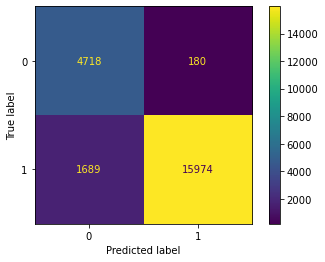

In [82]:
# plot confusion matrix
plot_confusion_matrix(down_XGB_model_best_params, X_val.values, y_val);

For XGB optimised parameters and down sampling our data points, we have a false postive of 3%, precision as 74%, recall of 96% and f1-score of 83%. Although, false positive was low (3%), both precision and f1-score are lower (18% precision and 6% f1-score difference) when we compare with adjusted XGB parameters. 

Let us use the same parameters for up-sampled data.

In [83]:
# fit up-sampled model with the best XGB parameters 
up_XGB_model_best_params = XGBClassifier(eta=0.3, gamma=0, 
                                      max_depth=8, min_child_weight=1, random_state=234).fit(X_train_up, y_train_up)

# print out the scores
print(f"Train accuracy: {up_XGB_model_best_params.score(X_train_up, y_train_up)}")
print(f"Validation accuracy: {up_XGB_model_best_params.score(X_val.values, y_val)}")



Train accuracy: 0.9941523305753039
Validation accuracy: 0.9539470768139711


In [84]:
# display the classification report
y_pred = up_XGB_model_best_params.predict(X_val.values)

up_report_XGB = classification_report(y_val, y_pred)
print(up_report_XGB)


              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4898
           1       0.98      0.96      0.97     17663

    accuracy                           0.95     22561
   macro avg       0.92      0.95      0.93     22561
weighted avg       0.96      0.95      0.95     22561



In [85]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# display the class distribution to see the totals for each class
display(y_val.value_counts())

# confusion matrix
confusion_matrix = pd.DataFrame(
    data = confusion_matrix(y_val, y_pred),
    index = ['True Churn', 'True Non-churn'],
    columns = ['Predicted Churn', 'Predicted Non-churn']
)
display(confusion_matrix)

1    17663
0     4898
Name: churn, dtype: int64

,Predicted Churn,Predicted Non-churn
True Churn,4565,333
True Non-churn,706,16957


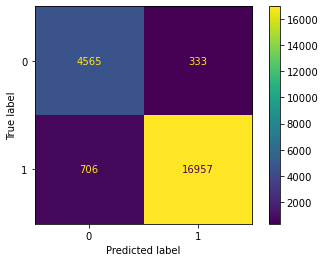

In [86]:
# plot confusion matrix
plot_confusion_matrix(up_XGB_model_best_params, X_val.values, y_val);

For XGB optimised parameters and up sampling our data points, we have a false postive of 7%, precision as 87%, recall of 93% and f1-score of 90%. The adjusted parameters for up-sampled has a better recall and f1-score but lower precision (5% difference) in comparison with optimised XGB parameters (with false postive of 13%).
Let us use the same parameters for down-sampled data.

Model | True Negative | False Positive| Precision(%) |    Recall(%)       |f1-score(%)
---------------|--------|------------- |-------------|-------------|-------------
Logistic Regression| 282 (6%)| 4616 (94%)|50 | 6 | 10
Decision Tree | 3593 (73%) | 1305 (27%) |73 | 73 | 73
KNN | 1364 (28%) | 3534 (72%) |45 | 28 | 34
Random Forest| 3235 (66%)| 1663 (34%)|91| 66| 77
XGBoost | 4145 (85%) | 753 (15%) |90 | 85 | 87
Down sampled| 4696 (96%)| 202 (4%)|71 | 96| 82
Up sampled | 4566 (93) | 332 (7%) |79 | 93 | 85
**XGB-optimised**| **4256 (87%)**| **642 (13%)**|**92** | **87**| **89**
**XGB_Down_sampled-optimised** | **4718 (96%)** | **180 (4%)** |**74** | **96** | **83**
**XGB_Up_sampled-optimised** | **4565 (93%)** | **333 (7%)** |**87** | **93** | **90**

If our goal is to identify as many of **true churn** as possible, and measure how well we achieve our goal (model evaluation) using precision, f1-score and recall values. 

From the table displayed above, we have our best models with **upsampled with XGB grid search** and **XGB optimised parameters**. The results are very close but because we have less false positive with optimised XGB upsampled, we will score our test set on optimised XGB upsampled. 
 
Now that we are statisfied with our model, let us score on our test set. 

### Final Model - Scoring on Test Set

Our best model involve upsampling class data points and runing XGB model using the following parameters:

* eta = 0
* gamma = 0
* max depth = 8
* min child weight = 1
* random_state=234

To begin with, we will use the upsampled X_train data, fit the model on XGB and score on test set.

In [87]:
# check the upsampled data

print('Original class distribution')
display(pd.Series(y2_train).value_counts().sort_index())

print('\nResampled class distribution (Downsampled)')
display(pd.Series(y_train_up).value_counts().sort_index())


Original class distribution


0    11427
1    41213
Name: churn, dtype: int64


Resampled class distribution (Downsampled)


0    41213
1    41213
dtype: int64

In [88]:
# fit the data 
XGB_model_up_sample = XGBClassifier(eta=0.3, gamma=0,max_depth=8, 
                            min_child_weight=1, random_state=234).fit(X_train_up, y_train_up)

# print accuracy results 
print(f"Train Accuracy: {XGB_model_up_sample.score(X_train_up, y_train_up)}")
print(f"Validation Accuracy: {XGB_model_up_sample.score(X_val.values, y_val)}")
print(f"Test Accuracy: {XGB_model_up_sample.score(X_test.values, y_test)}")

Train Accuracy: 0.9941523305753039
Validation Accuracy: 0.9539470768139711
Test Accuracy: 0.9503217913940748


In [89]:
# generate report for upsampling

y_pred_up_sample = XGB_model_up_sample.predict(X_test.values)

report_upsampled = classification_report(y_test, y_pred_up_sample)
print(report_upsampled)


              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4082
           1       0.98      0.96      0.97     14719

    accuracy                           0.95     18801
   macro avg       0.92      0.94      0.93     18801
weighted avg       0.95      0.95      0.95     18801



In [90]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# display the class distribution to see the totals for each class
display(y_test.value_counts())

# confusion matrix
confusion_matrix = pd.DataFrame(
    data = confusion_matrix(y_test, y_pred_up_sample),
    index = ['True Churn', 'True Non-churn'],
    columns = ['Predicted Churn', 'Predicted Non-churn']
)
display(confusion_matrix)

1    14719
0     4082
Name: churn, dtype: int64

,Predicted Churn,Predicted Non-churn
True Churn,3769,313
True Non-churn,621,14098


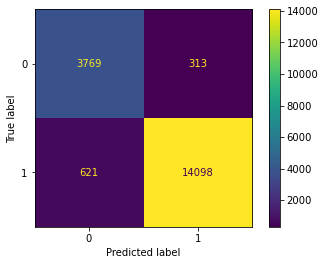

In [91]:
# plot confusion matrix
plot_confusion_matrix(XGB_model_up_sample, X_test.values, y_test);

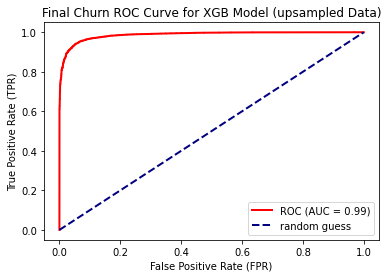

In [94]:
# probabilistic prediction
y_test_proba = XGB_model_up_sample.predict_proba(X_test.values)[:,1] 

# ROC arrays
fprs, tprs, thresholds = roc_curve(y_test, y_test_proba)

# AUC
roc_auc = roc_auc_score(y_test, y_test_proba)

# plot
plt.figure()
plt.plot(fprs, tprs, color='red', lw=2, label=f'ROC (AUC = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1],  lw=2, color='navy', linestyle='--', label='random guess') 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Final Churn ROC Curve for XGB Model (upsampled Data)')
plt.legend(loc='best')
plt.show()
    


Model | True Negative | False Positive| Precision(%) |    Recall(%)       |f1-score(%)
---------------|--------|------------- |-------------|-------------|-------------
Logistic Regression| 282 (6%)| 4616 (94%)|50 | 6 | 10
Decision Tree | 3593 (73%) | 1305 (27%) |73 | 73 | 73
KNN | 1364 (28%) | 3534 (72%) |45 | 28 | 34
Random Forest| 3235 (66%)| 1663 (34%)|91| 66| 77
XGBoost | 4145 (85%) | 753 (15%) |90 | 85 | 87
Down sampled| 4696 (96%)| 202 (4%)|71 | 96| 82
Up sampled | 4566 (93) | 332 (7%) |79 | 93 | 85
XGB-Grid Search| 4256 (87%)| 642 (13%)|92 | 87| 89
XGB_Down_sampled-Grid Search | 4718 (96%) | 180 (4%) |74 | 96 | 83
XGB_Up_sampled-Grid Search | 4565 (93%) | 333 (7%) |87 | 93 | 90
<font color=red> Test_set_Up_sampled_XGB</font>|<font color=red>3769 (93%)</font>|<font color=red>313 (7%)</font>|<font color=red>86</font>|<font color=red>92</font>|<font color=red>89</font>

Our test result is good! The model made predictions for the train and the test set: there is only 313 (7%) churn that was misclassified as non-churn with 86% precision, 92% recall and 89% f1-score. Therefore, we are able to detect customers (86% accurate) that are at the risk of churn and target them for marketing and retention. 

### Conclusion

In this notebook, we conducted modeling on our dataset to determine which model has the best performance using validation set with regards to correctly classifying churn class as truly churn with a good precision.

We concluded that upsampled with optimised XGB was the best and we went ahead to score and evaluate on our test set. 
The model performed very well on test set, with 7% false negative and 86% precision. 

We can use the model in this notebook and apply to determine customers that are at the risk of churn. This is not limited to eccommerce industry, the model may be applied to any industry that depends on customer for revenue and growth. 

Next steps:

We may want to explore the review comments of likely churn customers to have an idea if delivery, product prices or freight price is/are likely predictors of churn.